# Importing Modules

In [1]:
import import_ipynb
import CFAR as cfar
import CFAR_v2 as cfarv2
import GeoProcess as gp
import numpy as np
import imageResizing as ir

DATA_PATH = 'Dataset_963A/'

importing Jupyter notebook from CFAR.ipynb
importing Jupyter notebook from CFAR_v2.ipynb
importing Jupyter notebook from GeoProcess.ipynb
importing Jupyter notebook from imageResizing.ipynb


In [2]:
#Computing rows and columns
band_data_arr = gp.readGeoTiff(DATA_PATH+'LandMasked_Amplitude_VV.tif')
#subset_img = gp.readGeoTiff('Dataset_963A/CFARResults/meanfiltered_img.tif')
rows,col = band_data_arr.shape
#print(rows,col)
#gp.visualizeImg(band_data_arr)

(35, 35)
Image Saved Succesfully.


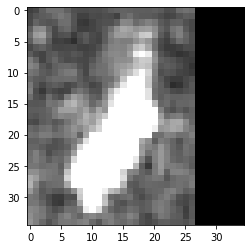

In [3]:
#subset_img = (gp.subsetImg(band_data_arr,4500,5700),5) #single ship
#subset_img = gp.subsetImg(band_data_arr,4950,5700) #multiple ship.

subset_img = band_data_arr[5853:5888,4594:4621]
subset_img = (ir.adjustImg(np.array(subset_img)))
print(subset_img.shape)
gp.visualizeImg(subset_img)
gp.save_img2Geotiff(subset_img,DATA_PATH+'CFARResults/Input.tif')

In [4]:
#arr = np.array(np.arange(36))
#arr = arr.reshape(6,6)
backgroundWindow_size = 7
guardWindow_size = 5
targetWindow_size = 3
kernel = 3
pfa = 0.99

In [5]:
print("CFAR Version 2")
cfar_version2 = cfarv2.CFAR_v2(subset_img,targetWindow_size,guardWindow_size,backgroundWindow_size,pfa)
finalImg_version2, DV_img,T_img = cfar_version2.shipDetection()

# print("CFAR version 1")
# cfar_filter = cfar.CFAR(subset_img,backgroundWindow_size,guardWindow_size,targetWindow_size,pfa,kernel)
# finalImg = cfar_filter.Shipdetection()

CFAR Version 2
Kernel Ready.
Computing P...



Process Completed, P image succesfully computed.

Computing DVi..



Process completed, DV image succesfully Computed.

Binary Image of Ships is Succesfully Generated.



CFAR_v2.ipynb:124: RuntimeWarning: invalid value encountered in double_scalars
  "        for i in tqdm(range(self.img.shape[0])):\n",


Image Saved Succesfully.


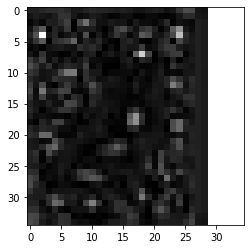

In [6]:
gp.visualizeBinaryImg(DV_img)
gp.save_img2Geotiff(DV_img,'Dataset_963A/CFARResults/Output_DVCFARversion2'+str(backgroundWindow_size)+str(guardWindow_size)+str(targetWindow_size)+'.tif')

Image Saved Succesfully.


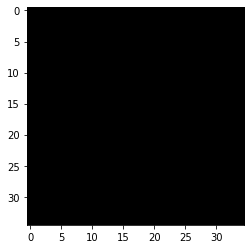

In [7]:
gp.visualizeBinaryImg(finalImg_version2)
gp.save_img2Geotiff(finalImg_version2,'Dataset_963A/CFARResults/Output_SHIPCFARversion2'+str(backgroundWindow_size)+str(guardWindow_size)+str(targetWindow_size)+'.tif')

Image Saved Succesfully.


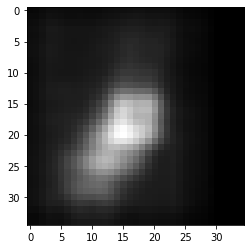

In [8]:
gp.visualizeBinaryImg(T_img)
gp.save_img2Geotiff(T_img,'Dataset_963A/CFARResults/Output_TCFARversion2'+str(backgroundWindow_size)+str(guardWindow_size)+str(targetWindow_size)+'.tif')

In [9]:
# gp.visualizeBinaryImg(finalImg)
# gp.save_img2Geotiff(finalImg,'Dataset_963A/CFARResults/Output_'+str(backgroundWindow_size)+str(guardWindow_size)+str(targetWindow_size)+'.tif')